# <font color='blue'>PROJETO</font>

# <font color='blue'>Agrupamento de Skills para grupo de treinamento entre colaboradores</font>

O Objetivo do processo é buscar afinidade entre os conhecimento atuais dos colabradores de uma empresa e definir Turmas onde eles possam trocar conhecimentos e se aprimorar.

Foi realizado um levantamento com colboradores sobre seus conhecimentos e mapeados os niveis de conhecimento como mateiral de fonte para o processo.

Para este processo foi levantado os dados dos colaboradores com o conhecimentos atuais e listados no arquivo em Excel, com as seguintes colonas:

Colaborador_gen: Indicação de cada colaborador (por questões de segurança os nomes foram anonimizados no arquivo fonte)<br>
Celula: Setor ou equipe que o colaborador pertence hoje<br>
Categoria: Área de conhecimento relacionado com o conhecimento que o colaborador possui<br>
Especialidade: Assunto em que o colaborador relaciona que está apto a aplicar<br>
Nivel: Nivel em que o colaborador se avalia no assunto<br>

Definimos que o próprio colaborador se avalie para que possamos afinar o auto-conhecimento da equipe após os processos de troca de conhecimento.

#### Carregando e Explorando o Dataset

In [1]:
# Carrega os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist, pdist
%matplotlib inline

In [2]:
# Carrega o dataset
hardskills = pd.read_csv('20210629_Colabs_HardSkills.csv', sep = ';')
hardskills.head()

,Colaborador_gen,Celula,Categoria,Especialidade,Nivel
0,Colaborador 1,TECH,Cloud,Azure,Avançado
1,Colaborador 1,TECH,Desenvolvimento,Script powershell,Avançado
2,Colaborador 1,TECH,Devops,Terraform,Avançado
3,Colaborador 1,TECH,Firewall,ForefrontTMG,Avançado
4,Colaborador 1,TECH,Firewall,Windows,Avançado


In [3]:
hardskills.columns

Index(['Colaborador_gen', 'Celula', 'Categoria', 'Especialidade', 'Nivel'], dtype='object')

In [4]:
# Avaliei que a coluna referente a célula de trabalho é indiferente para a formação das turmas, pois o importante 
# é o conhecimento a ser compartilhado. Assim, foi efetuada a remoção da coluna:

hardskills = hardskills.drop(['Celula'],axis=1)

In [5]:
hardskills.shape

(537, 4)

In [6]:
# Validando de há algum valor nulo no dataset, o que seria um erro de preenchimento: 
#(True= Existe valor Nulo / False = Não existe Valor Nulo)
hardskills.isnull().values.any()

False

In [7]:
hardskills.dtypes

Colaborador_gen    object
Categoria          object
Especialidade      object
Nivel              object
dtype: object

In [8]:
hardskills.head()

,Colaborador_gen,Categoria,Especialidade,Nivel
0,Colaborador 1,Cloud,Azure,Avançado
1,Colaborador 1,Desenvolvimento,Script powershell,Avançado
2,Colaborador 1,Devops,Terraform,Avançado
3,Colaborador 1,Firewall,ForefrontTMG,Avançado
4,Colaborador 1,Firewall,Windows,Avançado


#### Pré-processamento para variáveis categóricas - Encoding

In [9]:
ore = OneHotEncoder(handle_unknown='ignore')

In [10]:
hs_ore = ore.fit(hardskills.values)

In [11]:
hs_ore.categories_

[array(['Colaborador 1', 'Colaborador 10', 'Colaborador 11',
        'Colaborador 12', 'Colaborador 13', 'Colaborador 14',
        'Colaborador 15', 'Colaborador 16', 'Colaborador 17',
        'Colaborador 18', 'Colaborador 19', 'Colaborador 2',
        'Colaborador 20', 'Colaborador 21', 'Colaborador 3',
        'Colaborador 4', 'Colaborador 5', 'Colaborador 6', 'Colaborador 7',
        'Colaborador 8', 'Colaborador 9'], dtype=object),
 array(['Automação', 'Backup', 'Cloud', 'Data Science', 'Database',
        'Desenvolvimento', 'DevOps', 'Devops', 'E-mail/Collab',
        'E-mails/Collab', 'Firewall', 'Firewalls', 'Hardware',
        'Infraestrutura', 'Monitoramento', 'Proxy', 'Redes', 'SO',
        'Segurança', 'Servidores', 'Storage', 'Telefonia'], dtype=object),
 array(['3CX', 'AD', 'ASA Cisco', 'AWS', 'AWS EC2', 'AWS S3', 'Ansible',
        'Antivirus', 'Antivirus  Trend', 'Antivirus KasperSky',
        'Antivirus Macaffe', 'Antivirus Sophos', 'Antivirus Trend',
        'Anydesk'

In [12]:
hs_ore = ore.transform(hardskills.values).toarray()

In [13]:
hs_ore.shape

(537, 230)

In [14]:
hs_ore

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Determinando melhor valor de K com PCA -- Com o objetivo de usar o K-means

In [15]:
# Aplica redução de dimensionalidade
pca = PCA(n_components = 2).fit_transform(hs_ore)

In [16]:
# Determinando um range de K
k_range = range(1,12)

In [17]:
# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [18]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [19]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [20]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [21]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [22]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

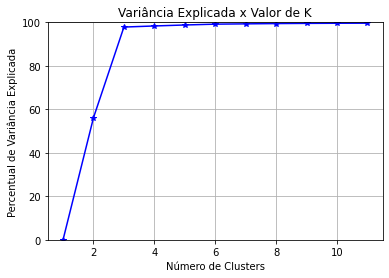

In [23]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

#### Clusterização em Python - Construção e Treinamento do Modelo KMeans

In [24]:
# Criando a versão do modelo a melhor quantidade de centroíde indicada pelo PCA --> 3 clusters

modelo_v1 = KMeans(n_clusters = 3)
modelo_v1.fit(pca)

KMeans(n_clusters=3)

#### Definição de Turmas de trabalho (Clusters)

In [25]:
# Lista com nomes das colunas
names = hardskills.columns
names

Index(['Colaborador_gen', 'Categoria', 'Especialidade', 'Nivel'], dtype='object')

In [26]:
# Cria o cluster map
resultado = pd.DataFrame(hardskills, columns = names)
resultado['Colaborador_gen'] = pd.Categorical(resultado['Colaborador_gen'])
resultado['Turma'] = modelo_v1.labels_

In [27]:
resultado

,Colaborador_gen,Categoria,Especialidade,Nivel,Turma
0,Colaborador 1,Cloud,Azure,Avançado,0
1,Colaborador 1,Desenvolvimento,Script powershell,Avançado,0
2,Colaborador 1,Devops,Terraform,Avançado,0
3,Colaborador 1,Firewall,ForefrontTMG,Avançado,0
4,Colaborador 1,Firewall,Windows,Avançado,0
...,...,...,...,...,...
532,Colaborador 9,Firewalls,Windows Firewall,Intermediario,2
533,Colaborador 9,Monitoramento,Service Now,Intermediario,2
534,Colaborador 9,Segurança,Antivirus KasperSky,Intermediario,2
535,Colaborador 9,Segurança,Antivirus Trend,Intermediario,2


In [28]:
resultado.to_csv("resultado.csv")

#### 1.Tratando o resultado para demostrar a melhor turma por colaborador

O dataset mostrará a turma que o colcaborador terá a melhor afinidade.

In [29]:
resultado_t1= resultado.drop(['Categoria','Especialidade','Nivel'],axis=1)
resultado_t1

,Colaborador_gen,Turma
0,Colaborador 1,0
1,Colaborador 1,0
2,Colaborador 1,0
3,Colaborador 1,0
4,Colaborador 1,0
...,...,...
532,Colaborador 9,2
533,Colaborador 9,2
534,Colaborador 9,2
535,Colaborador 9,2


In [30]:
resultado_t2 = resultado_t1.value_counts()
resultado_t2 = resultado_t2.to_frame()
resultado_t2 = resultado_t2.set_axis(['valores'], axis=1)
resultado_t2.head()

valores
Colaborador_gen Turma         
Colaborador 6   0           35
Colaborador 4   1           27
Colaborador 5   1           23
Colaborador 1   1           22
                2           20

In [31]:
resultado_t2.reset_index(inplace=True)

In [32]:
resultado_t2.head()

,Colaborador_gen,Turma,valores
0,Colaborador 6,0,35
1,Colaborador 4,1,27
2,Colaborador 5,1,23
3,Colaborador 1,1,22
4,Colaborador 1,2,20


In [33]:
resultado_t3 = resultado_t2.pivot(index='Colaborador_gen',columns='Turma',values='valores')
resultado_t3

Turma,0,1,2
Colaborador_gen,,,
Colaborador 1,19.0,22.0,20.0
Colaborador 10,2.0,1.0,7.0
Colaborador 11,16.0,5.0,9.0
Colaborador 12,NaN,3.0,1.0
Colaborador 13,NaN,12.0,12.0
Colaborador 14,NaN,2.0,NaN
Colaborador 15,3.0,9.0,13.0
Colaborador 16,4.0,8.0,5.0
Colaborador 17,NaN,15.0,1.0


In [34]:
resultado_tfinal = resultado_t3.replace(np.nan,0)

In [35]:
resultado_tfinal

Turma,0,1,2
Colaborador_gen,,,
Colaborador 1,19.0,22.0,20.0
Colaborador 10,2.0,1.0,7.0
Colaborador 11,16.0,5.0,9.0
Colaborador 12,0.0,3.0,1.0
Colaborador 13,0.0,12.0,12.0
Colaborador 14,0.0,2.0,0.0
Colaborador 15,3.0,9.0,13.0
Colaborador 16,4.0,8.0,5.0
Colaborador 17,0.0,15.0,1.0


In [36]:
resultado_tfinal.to_csv('resultado_turma_final.csv')

#### 2.Tratando o resultado para determinar o assunto melhor aboradado em cada turma

O dataset mostrará a turma que o assunto terá melhor afinidade terá a melhor afinidade.

In [45]:
resultado_c1= resultado.drop(['Colaborador_gen','Especialidade','Nivel'],axis=1)
resultado_c1

,Categoria,Turma
0,Cloud,0
1,Desenvolvimento,0
2,Devops,0
3,Firewall,0
4,Firewall,0
...,...,...
532,Firewalls,2
533,Monitoramento,2
534,Segurança,2
535,Segurança,2


In [56]:
resultado_c2 = resultado_c1.value_counts()
resultado_c2 = resultado_c2.to_frame()
resultado_c2 = resultado_c2.set_axis(['valores'], axis=1)
resultado_c2.head()

valores
Categoria       Turma         
Segurança       0           32
Servidores      1           28
                0           25
Desenvolvimento 2           25
Servidores      2           22

In [57]:
resultado_c2.reset_index(inplace=True)

In [58]:
resultado_c2.head()

,Categoria,Turma,valores
0,Segurança,0,32
1,Servidores,1,28
2,Servidores,0,25
3,Desenvolvimento,2,25
4,Servidores,2,22


In [59]:
resultado_c3 = resultado_c2.pivot(index='Categoria',columns='Turma',values='valores')
resultado_c3

Turma,0,1,2
Categoria,,,
Automação,NaN,NaN,1.0
Backup,2.0,18.0,10.0
Cloud,1.0,13.0,3.0
Data Science,NaN,2.0,2.0
Database,2.0,20.0,5.0
Desenvolvimento,9.0,22.0,25.0
DevOps,NaN,4.0,NaN
Devops,1.0,19.0,10.0
E-mail/Collab,1.0,4.0,6.0


In [60]:
resultado_cfinal = resultado_c3.replace(np.nan,0)

In [61]:
resultado_cfinal

Turma,0,1,2
Categoria,,,
Automação,0.0,0.0,1.0
Backup,2.0,18.0,10.0
Cloud,1.0,13.0,3.0
Data Science,0.0,2.0,2.0
Database,2.0,20.0,5.0
Desenvolvimento,9.0,22.0,25.0
DevOps,0.0,4.0,0.0
Devops,1.0,19.0,10.0
E-mail/Collab,1.0,4.0,6.0


In [62]:
resultado_cfinal.to_csv('resultado_categoria_final.csv')

#### 3.Tratando o resultado para definir a Especilidade de cada turma

O dataset mostrará a especilidade que terá a melhor afinidade com cada turma.

In [63]:
resultado_e1= resultado.drop(['Categoria','Colaborador_gen','Nivel'],axis=1)
resultado_e1

,Especialidade,Turma
0,Azure,0
1,Script powershell,0
2,Terraform,0
3,ForefrontTMG,0
4,Windows,0
...,...,...
532,Windows Firewall,2
533,Service Now,2
534,Antivirus KasperSky,2
535,Antivirus Trend,2


In [64]:
resultado_e2 = resultado_e1.value_counts()
resultado_e2 = resultado_e2.to_frame()
resultado_e2 = resultado_e2.set_axis(['valores'], axis=1)
resultado_e2.head()

,,valores
Especialidade,Turma,
Windows,0,11
VEEM,1,7
Windows Server,1,6
Oracle,1,6
VEEM,2,6


In [65]:
resultado_e2.reset_index(inplace=True)

In [66]:
resultado_e2.head()

,Especialidade,Turma,valores
0,Windows,0,11
1,VEEM,1,7
2,Windows Server,1,6
3,Oracle,1,6
4,VEEM,2,6


In [67]:
resultado_e3 = resultado_e2.pivot(index='Especialidade',columns='Turma',values='valores')
resultado_e3

Turma,0,1,2
Especialidade,,,
3CX,NaN,5.0,NaN
AD,3.0,2.0,3.0
ASA Cisco,NaN,NaN,1.0
AWS,NaN,4.0,2.0
AWS EC2,NaN,1.0,NaN
...,...,...,...
Windows Server 2016,NaN,NaN,1.0
Windows VPN,1.0,NaN,NaN
Zabbix,NaN,5.0,4.0


In [68]:
resultado_efinal = resultado_e3.replace(np.nan,0)

In [69]:
resultado_efinal

Turma,0,1,2
Especialidade,,,
3CX,0.0,5.0,0.0
AD,3.0,2.0,3.0
ASA Cisco,0.0,0.0,1.0
AWS,0.0,4.0,2.0
AWS EC2,0.0,1.0,0.0
...,...,...,...
Windows Server 2016,0.0,0.0,1.0
Windows VPN,1.0,0.0,0.0
Zabbix,0.0,5.0,4.0


In [70]:
resultado_efinal.to_csv('resultado_especialidade_final.csv')